In [1]:
ehflst = []
edm1hflst = []
edm2hflst = []
efcilst = []
edm1fcilst = []
edm2fcilst = []

from functools import reduce
from pyscf import gto, scf, lo, ao2mo, fci
import numpy as np
from simple_dmet import *

def make_Hring(l=1.):
    r = l/(2 * np.sin(np.pi / 10))
    atmlst = []
    for i in range(10):
        atmlst.append(['H', (r*np.cos(2. * np.pi/10*i), r*np.sin(2. * np.pi/10*i), 0)])
    mol = gto.Mole()
    mol.atom = atmlst
    mol.basis = 'sto-6g'
    mol.build()
    return mol

bllst = np.linspace(0.5, 2.5, 21)
def main():

    fraglst = [[0], [0,1]]
    for bl in bllst:
        mol = make_Hring(bl)
        m = scf.RHF(mol)
        m.kernel()

        ehflst.append(m.e_tot)
        for fragment in fraglst:

            dmetscf = DMET_SCF(m, fragment, mu_glob=0.05)

            """
            def f(mu_glob):
                dmetscf.change_mu_glob(mu_glob)
                e, nx = dmetscf.rhf()
                return nx-len(fragment)

            mu_glob, count = secant(f, 0, 0.1, 1E-12)
            print("Call Final RHF!")
            e1, nx = dmetscf.rhf()
            print("End Call !")

            if len(fragment) == 1: 
                edm1hflst.append(e1*10 + m.energy_nuc())
            else: 
                edm2hflst.append(e1*5 + m.energy_nuc())
            """

            dmetscf = DMET_SCF(m, fragment, mu_glob=0.05)

            def g(mu_glob):
                dmetscf.change_mu_glob(mu_glob)
                e, nx = dmetscf.fci()
                return nx-len(fragment)

            mu_glob, count = secant(g, 0, 0.1, 1E-12)

            print("Call DMET FCI!")
            e2, nx = dmetscf.fci()
            print("End Call !")

            if len(fragment) == 1:
                edm1fcilst.append(e2 * 10 + m.energy_nuc())
            else:
                edm2fcilst.append(e2 * 5 + m.energy_nuc())

        cis = fci.FCI(m)
        efcilst.append(cis.kernel()[0])

main()

np.savetxt("e_u0.txt", np.array([bllst, ehflst, efcilst, edm1fcilst, edm2fcilst]))

converged SCF energy = -2.8740539638265
Number of Fragment Orbitals: 1
True
Call DMET FCI!
End Call !
Number of Fragment Orbitals: 2
True
Call DMET FCI!
End Call !
Call direct_spin1 // By Shuoxue Li
converged SCF energy = -4.2111879629811
Number of Fragment Orbitals: 1
True
Call DMET FCI!
End Call !
Number of Fragment Orbitals: 2
True
Call DMET FCI!
End Call !
Call direct_spin1 // By Shuoxue Li
converged SCF energy = -4.86581202324304
Number of Fragment Orbitals: 1
True
Call DMET FCI!
End Call !
Number of Fragment Orbitals: 2
True
Call DMET FCI!
End Call !
Call direct_spin1 // By Shuoxue Li
converged SCF energy = -5.16860602808421
Number of Fragment Orbitals: 1
True
Call DMET FCI!
End Call !
Number of Fragment Orbitals: 2
True
Call DMET FCI!
End Call !
Call direct_spin1 // By Shuoxue Li
converged SCF energy = -5.27778829697624
Number of Fragment Orbitals: 1
True
Call DMET FCI!
End Call !
Number of Fragment Orbitals: 2
True
Call DMET FCI!
End Call !
Call direct_spin1 // By Shuoxue Li
co

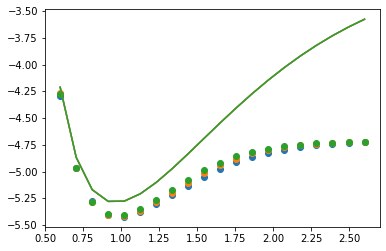

In [31]:


bllst = np.linspace(0.6, 2.6, 20)



In [4]:
import matplotlib as mpl

params = {
        "font.family":     "serif",
}

mpl.rcParams.update(params)

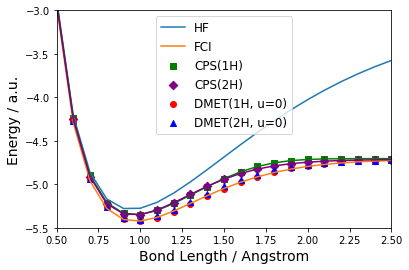

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data_Hring.csv")


bllst, esscpslst = np.loadtxt("e_sscps_u0.txt")

bllst, ehflst, efcilst, edm1fcilst, edm2fcilst = np.loadtxt("e_u0.txt")

bllst, edscpslst = np.loadtxt("e_dscps_u0.txt")

plt.plot(bllst, ehflst, label="HF")
plt.plot(bllst, efcilst, label="FCI")
plt.plot(bllst, esscpslst, color="green")
plt.scatter(bllst, esscpslst, color="green", marker="s", label=r"CPS(1H)")
plt.plot(bllst, edscpslst, color='purple')
plt.scatter(bllst, edscpslst, color="purple", marker="D", label="CPS(2H)")
plt.scatter(bllst, edm1fcilst, label="DMET(1H, u=0)", color="red")
plt.scatter(bllst, edm2fcilst, label="DMET(2H, u=0)", color="blue", marker="^")

plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel("Energy / a.u.", fontsize=14)
plt.xlim(0.5, 2.5)
plt.ylim(-5.5, -3.0)

plt.legend(fontsize=12)
plt.show()

In [1]:


plt.scatter(bllst, (edm1fcilst-ehflst)/(efcilst-ehflst)*100, color="Red", label="DMET(1H, u=0)")
plt.scatter(bllst, (edm2fcilst-ehflst)/(efcilst-ehflst)*100, color="blue", marker="^", label="DMET(2H, u=0)")
plt.scatter(bllst, (esscpslst-ehflst)/(efcilst-ehflst)*100, color="green", marker="s", label=r"CPS(1H)")
plt.scatter(bllst, (edscpslst-ehflst)/(efcilst-ehflst)*100, color="purple", marker="D",
label="CPS(2H)")

plt.plot(bllst, (edscpslst-ehflst)/(efcilst-ehflst)*100, color="purple")

plt.plot(bllst, (edm1fcilst-ehflst)/(efcilst-ehflst)*100, color="Red")
plt.plot(bllst, (edm2fcilst-ehflst)/(efcilst-ehflst)*100, color="blue")
plt.plot(bllst, (esscpslst-ehflst)/(efcilst-ehflst)*100, color="Green")
plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel("% Correlation Energy", fontsize=13)

plt.xlim(0.5, 2.5)
plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel(r"$\Delta E$ / a.u.", fontsize=14)
plt.hlines(100, 0.5, 2.5, colors='grey', linestyles="--")
plt.legend(fontsize=12)
plt.show()

NameError: name 'plt' is not defined

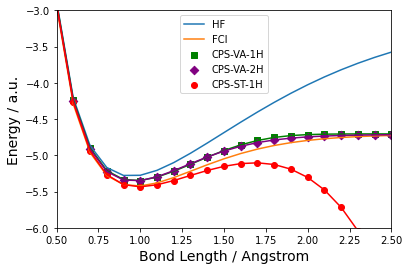

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data_Hring.csv")

bllst = df["length"]
va_ss = df["GWF-VA-DMET-1H"]
va_ds = df["GWF-VA-DMET-2H"]
hf = df["HF"]
fci = df["FCI"]


bllst, st_ss = np.loadtxt("e-1H-st.txt")
bllst, st_ds = np.loadtxt("e-2H-st.txt")

plt.plot(bllst, hf, label="HF")
plt.plot(bllst, fci, label="FCI")
plt.plot(bllst, va_ss, color="green")
plt.scatter(bllst, va_ss, color="green", marker="s", label=r"CPS-VA-1H")
plt.plot(bllst, va_ds, color='purple')
plt.scatter(bllst, va_ds, color="purple", marker="D", label="CPS-VA-2H")


plt.plot(bllst, st_ss, color="red")
plt.scatter(bllst, st_ss, color="Red", label="CPS-ST-1H")
plt.plot(bllst, st_ds, color="blue")
plt.scatter(bllst, st_ds, color="blue", marker="^", label="CPS-ST-2H")

plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel("Energy / a.u.", fontsize=14)
plt.xlim(0.5, 2.5)
plt.ylim(-6, -3)
plt.legend()
plt.show()

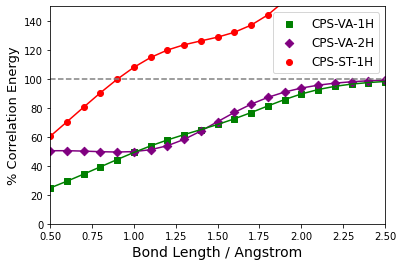

In [6]:


plt.scatter(bllst, (va_ss-hf)/(fci-hf)*100, color="green", marker="s", label=r"CPS-VA-1H")
plt.scatter(bllst, (va_ds-hf)/(fci-hf)*100, color="purple", marker="D",
label="CPS-VA-2H")
plt.scatter(bllst, (st_ss-hf)/(fci-hf)*100, color="red", label="CPS-ST-1H")
plt.plot(bllst, (va_ds-hf)/(fci-hf)*100, color="purple")
plt.plot(bllst, (va_ss-hf)/(fci-hf)*100, color="Green")
plt.plot(bllst, (st_ss-hf)/(fci-hf)*100, color="Red")
plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel("% Correlation Energy", fontsize=13)

plt.xlim(0.5, 2.5)

plt.hlines(100, 0.5, 2.5, colors='grey', linestyles="--")
plt.legend(fontsize=12)
plt.ylim(0,150)
plt.show()

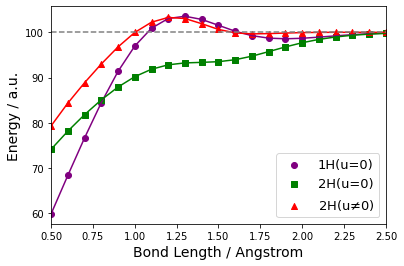

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data_Hring.csv")

bllst = df["length"]
dmet_1h = df["DMET-FCI-1H"]
dmet_2h = df["DMET-FCI-2H"]
dmet_2hu = df["DMET-FCI-2H-U"]
hf = df["HF"]
fci = df["FCI"]



plt.plot(bllst, (dmet_1h-hf)/(fci-hf)*100, color="purple")
plt.plot(bllst, (dmet_2h-hf)/(fci-hf)*100, color="Green")
plt.plot(bllst, (dmet_2hu-hf)/(fci-hf)*100, color="Red")

plt.scatter(bllst, (dmet_1h-hf)/(fci-hf)*100, color="purple", label="1H(u=0)")
plt.scatter(bllst, (dmet_2h-hf)/(fci-hf)*100, color="Green", marker='s', label="2H(u=0)")
plt.scatter(bllst, (dmet_2hu-hf)/(fci-hf)*100, color="Red", marker='^', label=r"2H(u$\ne$0)")

plt.hlines(100, 0.5, 2.5, colors='grey', linestyles="--")
plt.xlabel(r"Bond Length / Angstrom", fontsize=14)
plt.ylabel("Energy / a.u.", fontsize=14)
plt.xlim(0.5, 2.5)
plt.legend(fontsize=13)
plt.show()